<a href="https://colab.research.google.com/github/JayaManasa/CV-learning-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

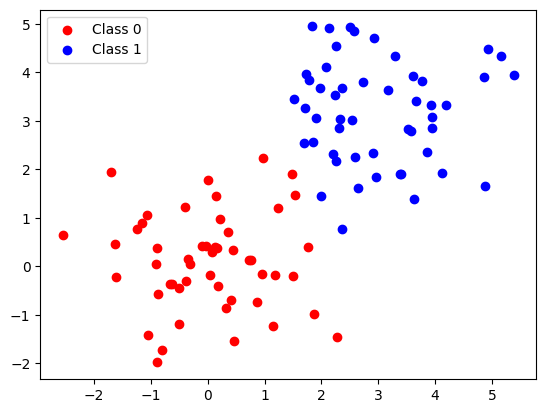

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two classes
np.random.seed(0)
class_0 = np.random.randn(50, 2)
class_1 = np.random.randn(50, 2) + [3, 3]

# Visualize the data
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.show()


k sets number of neighbors to be considered.
fit: soting the training data and doesn't build any model during training phase.
For each data point in X, it predicts a label.Compute the Euclidean distance between x and each training point.
Sort these distances and get indices of the k smallest values.
Get the labels for these k indices.
Count the number of occurrences of each label within these k labels and return the most frequent one.


In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [3]:
from sklearn.model_selection import train_test_split

# Prepare data
X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Using the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Loading the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten and normalize the images
train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0

# For efficiency, let's use a subset
train_images, _, train_labels, _ = train_test_split(train_images, train_labels, train_size=0.1, random_state=0)
test_images, _, test_labels, _ = train_test_split(test_images, test_labels, train_size=0.1, random_state=0)


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [6]:
# Using KNN for prediction
knn = KNN(k=3)
knn.fit(train_images, train_labels)
predictions = knn.predict(test_images[:100])  # Limiting to 100 test samples for speed

# Calculating accuracy
accuracy = np.mean(predictions == test_labels[:100])
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 92.00%
